### Deep NN using pytorch to implement a classification model for iris dataset, The below code does the following 

#### 1) Load all the required library, we are using pytorch for running the deep nn model, for the dataset we are loading iris dataset, this is a classification dataset and there are three classification that this dataset output, which we call as target, the target columns are species and it outputs 
#####                - Setosa (Class 0): Iris Setosa
#####                - Versicolor (Class 1): Iris Versicolor
#####                - Virginica (Class 2): Iris Virginica

#### 2) The dataset which is a numpy dataset will be converted into tensor as pytorch works better and faster with tensor form, for this the features are converted into float and the target is converted into int64

#### 3) we will run the neural network using Sequential model with the following specification
#####           - The first layer will be a linear model using RelU activation, it will take 4 input features and output 12 features
#####           - The second layer will also be layer and will be using RelU activation, this will take the 12 feature from previous hidden layer and output 8 features.
#####           - The third layer will be the final layer and it will take the 8 input from previous layer and output 3 features, this is the final classification we are doing

#### 4) The model is trained using CrossEntropyLoss and optimized with Adam for 100 epochs and batch size of 10, with the training loss plotted for visualization.

#### 5) The model is run for multiple iteration based on the value of epoch and will be run in batch size configured, this will try to do a backpropagation by learning , using the learning rate provided , as it learns the Gradient loss will be calculated and we will observe how the loss function is doing, if the loss is reducing after a certain iteration that means the model is improving after multiple iteration. we need to be carefull, sometime the learning rate might increase when the number of epoch is given too high, to find the balance we need to do a trial with different configuration like epoch, batch size, learning rate.

##### 6) the last step is to compare the accuracy between the predicted value and the target value we already stored in Y, this will give a accuracy rate 


Training Time (in minutes) = 0.01936688820521037


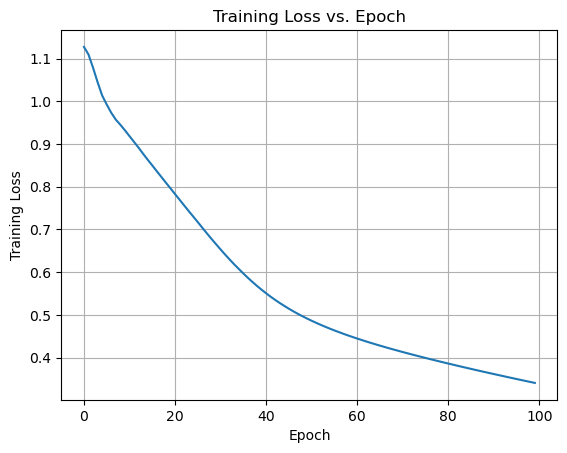

Accuracy 0.9733333587646484
[5.099999904632568, 3.5, 1.399999976158142, 0.20000000298023224] => 0 (expected 0)
[4.900000095367432, 3.0, 1.399999976158142, 0.20000000298023224] => 0 (expected 0)
[4.699999809265137, 3.200000047683716, 1.2999999523162842, 0.20000000298023224] => 0 (expected 0)
[4.599999904632568, 3.0999999046325684, 1.5, 0.20000000298023224] => 0 (expected 0)
[5.0, 3.5999999046325684, 1.399999976158142, 0.20000000298023224] => 0 (expected 0)
[5.400000095367432, 3.9000000953674316, 1.7000000476837158, 0.4000000059604645] => 0 (expected 0)
[4.599999904632568, 3.4000000953674316, 1.399999976158142, 0.30000001192092896] => 0 (expected 0)
[5.0, 3.4000000953674316, 1.5, 0.20000000298023224] => 0 (expected 0)
[4.400000095367432, 2.9000000953674316, 1.399999976158142, 0.20000000298023224] => 0 (expected 0)
[4.900000095367432, 3.0999999046325684, 1.5, 0.10000000149011612] => 0 (expected 0)
[5.400000095367432, 3.700000047683716, 1.5, 0.20000000298023224] => 0 (expected 0)
[4.800000

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from time import time
import matplotlib.pyplot as plt

# load the dataset, split into input (X) and output (y) variables
dataset = np.loadtxt('iris_dataset.csv', delimiter=',')
X = dataset[:, 0:4]
y = dataset[:, 4] 

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)  # Use int64 for multi-class classification

model = nn.Sequential(
    nn.Linear(4, 12),
    nn.ReLU(),
    nn.Linear(12, 8),
    nn.ReLU(),
    nn.Linear(8, 3),  # The last layer will be 3 for 3-class classification
)

# train the model
loss_fn = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

n_epochs = 100
batch_size = 10
time0 = time()

# Lists to store epoch and loss values for plotting
epoch_list = []
loss_list = []

for epoch in range(n_epochs):
    running_loss = 0
    for i in range(0, len(X), batch_size):
        Xbatch = X[i:i + batch_size]
        y_pred = model(Xbatch)
        ybatch = y[i:i + batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Calculate the average loss for the current epoch
    avg_loss = running_loss / (len(X) / batch_size)

    # Append epoch and loss values to the lists
    epoch_list.append(epoch)
    loss_list.append(avg_loss)

print("\nTraining Time (in minutes) =", (time() - time0) / 60)

# Plotting the training loss
plt.plot(epoch_list, loss_list)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss vs. Epoch')
plt.grid(True)
plt.show()

# compute accuracy
y_pred = model(X)
predicted_labels = torch.argmax(y_pred, dim=1)
accuracy = (predicted_labels == y).float().mean()
print(f"Accuracy {accuracy}")

# make class predictions with the model
for i in range(15):
    print('%s => %d (expected %d)' % (X[i].tolist(), predicted_labels[i], y[i]))
